In [1]:
import pandas as pd
import numpy as np
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import  make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df=pd.read_csv('RTA_preprocessed.csv')
df.head()


,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,male,above high school,employee,1-2yr,car,residential areas,unknown,no junction,asphalt roads,daylight,normal,collision with roadside-parked vehicles,2,going straight,not a pedestrian,moving backward,Slight Injury
1,31-50,male,junior high school,employee,above 10yr,bus,office areas,undivided two way,no junction,asphalt roads,daylight,normal,vehicle with vehicle collision,2,going straight,not a pedestrian,overtaking,Slight Injury
2,18-30,male,junior high school,employee,1-2yr,lorry,recreational areas,other,no junction,asphalt roads,daylight,normal,collision with roadside objects,2,going straight,not a pedestrian,changing lane to the left,Serious Injury
3,18-30,male,junior high school,employee,5-10yr,bus,office areas,other,y shape,earth roads,darkness - lights lit,normal,vehicle with vehicle collision,2,going straight,not a pedestrian,changing lane to the right,Slight Injury
4,18-30,male,junior high school,employee,2-5yr,other,industrial areas,other,y shape,asphalt roads,darkness - lights lit,normal,vehicle with vehicle collision,2,going straight,not a pedestrian,overtaking,Slight Injury


In [2]:
x=df.drop('Accident_severity',axis=1)
y=df['Accident_severity']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(y_train.groupby(y_train).count())

Accident_severity
Fatal injury        93
Serious Injury     984
Slight Injury     5617
Name: Accident_severity, dtype: int64


TypeError: unhashable type: 'numpy.ndarray'

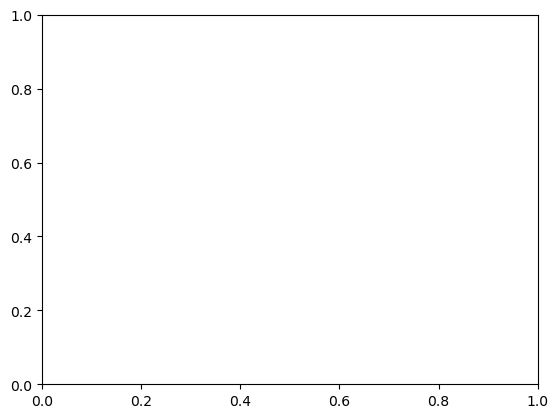

In [5]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 

plt.scatter(x,y)
plt.plot(x, y, 'r')

In [8]:
ohe=OneHotEncoder()
ohe.fit(x[['Age_band_of_driver','Sex_of_driver','Educational_level','Vehicle_driver_relation','Driving_experience','Type_of_vehicle','Area_accident_occured','Lanes_or_Medians','Types_of_Junction','Road_surface_type','Light_conditions','Weather_conditions','Type_of_collision','Vehicle_movement','Pedestrian_movement','Cause_of_accident']])

OneHotEncoder()

In [10]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Age_band_of_driver','Sex_of_driver','Educational_level','Vehicle_driver_relation','Driving_experience','Type_of_vehicle','Area_accident_occured','Lanes_or_Medians','Types_of_Junction','Road_surface_type','Light_conditions','Weather_conditions','Type_of_collision','Vehicle_movement','Pedestrian_movement','Cause_of_accident']),remainder='passthrough')


In [ ]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
pipe=make_pipeline(column_trans,rf)
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)
print(classification_report(y_test,pipe.predict(X_test)))
print(accuracy_score(y_test,pipe.predict(X_test)))

                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        19
Serious Injury       0.50      0.02      0.04       217
 Slight Injury       0.86      1.00      0.92      1438

      accuracy                           0.86      1674
     macro avg       0.45      0.34      0.32      1674
  weighted avg       0.80      0.86      0.80      1674

0.8590203106332138


c:\Users\MUFEEZ\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MUFEEZ\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MUFEEZ\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
# Saving the model to disk
with open('rf2_model.pkl', 'wb') as f:
    pickle.dump(pipe, f)